In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [294]:
df = pd.read_csv('https://bit.ly/kaggletrain')

In [295]:
df.dropna(inplace=True)

In [296]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [297]:
df_final = df[['Age','Fare','Survived']]

In [298]:
df_final.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [299]:
# def gender_class(df):
#     if df == 'male':
#         return 1
#     else:
#         return 0

In [300]:
# df_final['Sex'] = df_final['Sex'].apply(gender_class)

In [301]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

In [302]:
print('X Shape:',X.shape)
print('y Shape:',y.shape)

X Shape: (183, 2)
y Shape: (183,)


In [303]:
from sklearn.linear_model import Perceptron

In [304]:
p = Perceptron()
p.fit(X,y)

Perceptron()

<Axes: xlabel='Age', ylabel='Fare'>

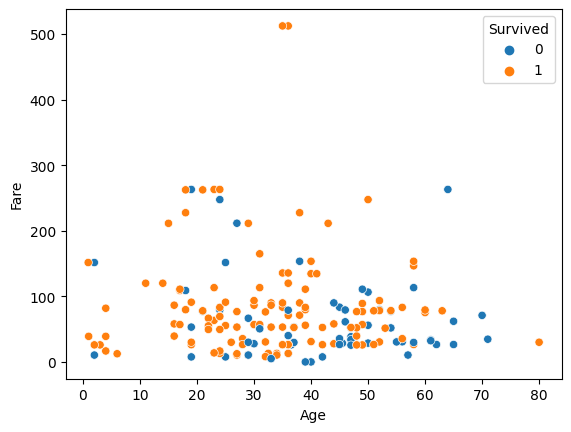

In [305]:
sns.scatterplot(data = df_final, x= 'Age',y='Fare', hue = 'Survived')

In [306]:
w1,w2 = p.coef_[0]
print(w1,w2)

-15.159999999999997 27.927900000000015


In [307]:
bias = p.intercept_[0]
print(bias)

66.0


In [308]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

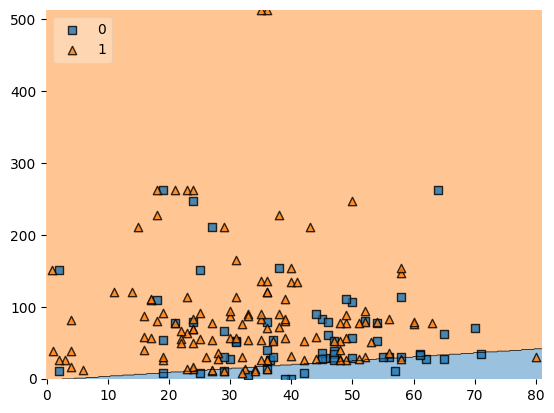

In [309]:
plot_decision_regions(X.values,y.values,clf=p, legend = 2)

## Code for a ANN

In [310]:
drop_cols = ['PassengerId','Name','Ticket','Cabin']

df_mod = df.drop(columns=drop_cols)

df_mod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [311]:
df_mod = pd.get_dummies(df_mod,columns=['Sex','Embarked'], drop_first=True)

In [312]:
X = df_mod.iloc[:,1:]
y = df_mod.iloc[:,:1]

In [313]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)

(146, 8)
(37, 8)


In [327]:
df_mod['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [314]:
df_mod

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0,0,1
872,0,1,33.0,0,0,5.0000,1,0,1
879,1,1,56.0,0,1,83.1583,0,0,0
887,1,1,19.0,0,0,30.0000,0,0,1


In [315]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
632,1,32.0,0,0,30.5000,1,0,0
700,1,18.0,1,0,227.5250,0,0,0
772,2,57.0,0,0,10.5000,0,0,1
712,1,48.0,1,0,52.0000,1,0,1
591,1,52.0,1,0,78.2667,0,0,0
...,...,...,...,...,...,...,...,...
647,1,56.0,0,0,35.5000,1,0,0
679,1,36.0,0,1,512.3292,1,0,0
345,2,24.0,0,0,13.0000,0,0,1
690,1,31.0,1,0,57.0000,1,0,1


## Scaling is required

In [316]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [317]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense

In [318]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim = 8))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [319]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [320]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [321]:
history = model.fit(X_train_scaled,y_train, epochs= 500, validation_split=0.2)

Epoch 1/500
4/4 [==============================] - 0s 21ms/step - loss: 0.7400 - accuracy: 0.3362 - val_loss: 0.7273 - val_accuracy: 0.3000
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7334 - accuracy: 0.3190 - val_loss: 0.7217 - val_accuracy: 0.3000
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7273 - accuracy: 0.3448 - val_loss: 0.7165 - val_accuracy: 0.3333
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7223 - accuracy: 0.3103 - val_loss: 0.7118 - val_accuracy: 0.3000
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7175 - accuracy: 0.2845 - val_loss: 0.7078 - val_accuracy: 0.3333
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.3190 - val_loss: 0.7040 - val_accuracy: 0.4000
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.7096 - accuracy: 0.3879 - val_loss: 0.7008 - val_accuracy: 0.3333
Epoch 8/500
4/4 [=========

In [322]:
model.layers[0].get_weights()

[array([[-0.81458753,  0.44656596,  0.4976203 ,  0.62250173,  0.5048024 ,
         -0.6891863 ,  0.155261  ,  0.78993654],
        [ 0.10002182,  0.13950837, -0.03049707,  0.48903793, -0.6955172 ,
         -0.50515383,  0.58451724,  0.36391738],
        [-0.491455  ,  0.66868097,  0.8410488 , -0.24131931, -0.1563591 ,
         -0.47652528,  0.52819026,  0.68705076],
        [-0.07132094, -0.12865636, -0.42238835,  0.37998873, -0.37467247,
          0.4166171 , -0.23896554, -0.5177738 ],
        [ 0.4294402 ,  0.9470626 ,  0.9011081 , -0.42574435, -0.17184919,
         -0.41622263,  0.14767885,  0.07550593],
        [ 0.9971036 , -0.14817806, -0.53101844, -0.35410148,  0.04917099,
         -0.45974094, -0.33279225, -0.2969913 ],
        [ 0.06419426, -0.04715078,  0.15828995,  0.5064804 , -0.624088  ,
          0.32130823, -0.47039303, -0.19217683],
        [-0.06278814,  0.13211153, -0.2978155 , -0.2856672 , -0.45978254,
          0.6886203 ,  0.12988858, -0.5655429 ]], dtype=float32),

In [323]:
model.layers[1].get_weights()

[array([[ 0.78387463,  0.52474666, -0.27630866, -0.68981683],
        [-0.13250023, -0.3902541 , -1.185322  ,  0.35937575],
        [-0.68501955, -0.23606952, -0.8063881 , -0.06503069],
        [ 0.42856514,  0.6118274 ,  0.2765484 ,  0.05900957],
        [-0.6698262 , -0.6010595 ,  0.30755636, -0.14192167],
        [-0.03167215, -0.9046998 ,  0.68617815,  0.7538322 ],
        [ 0.4870985 ,  0.07587205,  0.8174721 , -0.670994  ],
        [ 0.19869538,  0.23600306,  0.91197115, -0.6572363 ]],
       dtype=float32),
 array([0.10695892, 0.05660948, 0.0594812 , 0.26774925], dtype=float32)]

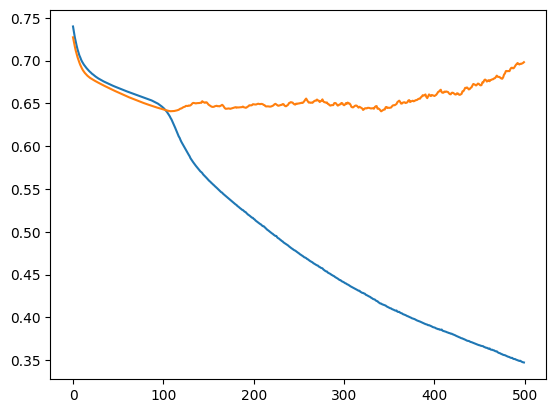

In [324]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

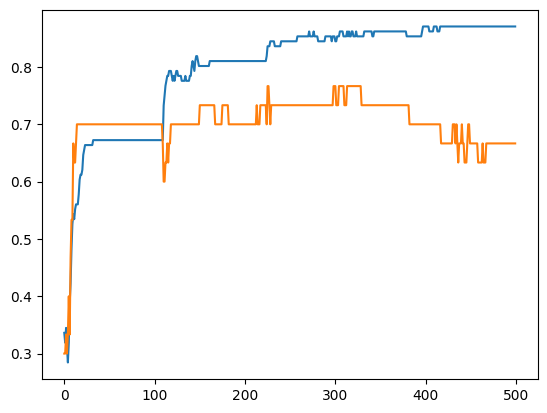

In [325]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [3]:
import pandas as pd
df = pd.DataFrame({'A':[1,2,3]})

In [4]:
df_v1 = df

In [5]:
df_v1

,A
0,1
1,2
2,3


In [6]:
df

,A
0,1
1,2
2,3


In [8]:
df_v1['A'] = [3,4,5]

In [9]:
df_v1

,A
0,3
1,4
2,5


In [10]:
df

,A
0,3
1,4
2,5
